In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
df = pd.read_csv("star_data.csv")
df

,Star Name,Distance (pc),Image URL,Spectral Class,Center Pixel,L/L_o
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')",255,0.656000
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')",255,23.600000
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')",233,97.521203
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')",255,8.149287
...,...,...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')",255,40.426122
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')",255,15.118020
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')",255,46.156500


In [3]:
test = Image.open("Star Images/Achernar_removedbg.jpg")
test_array = list(image.img_to_array(test))
for i in range(len(test_array)):
    test_array[i] = list(test_array[i])
print(test_array)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [34]:
from PIL import ImageStat
height, width, channels = 500, 500, 3
target_size = (500, 500)
image_dir = 'Star Images/'
image_files = [(f + ".jpg") for f in list(df["Star Name"])]
images = []
for image_file in image_files:
    print("Currently working on: " + image_file, end="\t")
    img_path = os.path.join(image_dir, image_file)
    img = Image.open(img_path)
    test_array = list(image.img_to_array(img))
    for i in range(len(test_array)):
        test_array[i] = list(test_array[i])
        for j in range(len(test_array[i])):
            test_array[i][j] = list(test_array[i][j])
    
    new_array = []
    for i in range(len(test_array)):
        for j in range(len(test_array[i])):
            new_array.append(test_array[i][j])
    
    # remove all [0.0, 0.0, 0.0] from new_array
    new_array = [i for i in new_array if i != [0.0, 0.0, 0.0]]

    r = 0
    g = 0
    b = 0
    for i in range(len(new_array)):
        r += new_array[i][0]
        g += new_array[i][1]
        b += new_array[i][2]
    r = r / len(new_array)
    g = g / len(new_array)
    b = b / len(new_array)
    avg_val = [r / 255, g / 255, b / 255]
    images.append(avg_val)
    print("Found average color: " + str(avg_val))
images

Currently working on: Absolutno.jpg	Found average color: [0.06546649842841529, 0.061818487417610236, 0.06306176968088248]
Currently working on: Acamar.jpg	Found average color: [0.0703063214677277, 0.08608331478327491, 0.11336223848143338]
Currently working on: Achernar.jpg	Found average color: [0.2937458249537873, 0.30211427285569037, 0.31357900768110325]
Currently working on: Achird.jpg	Found average color: [0.08292433619808275, 0.07812593964792938, 0.07373762134693837]
Currently working on: Acubens.jpg	Found average color: [0.07680351310459976, 0.09873005676739496, 0.13554175485062805]
Currently working on: Adhafera.jpg	Found average color: [0.08072964511704579, 0.07907467667250362, 0.07036941646690935]
Currently working on: Adhil.jpg	Found average color: [0.11784829322960827, 0.09453749855765274, 0.06811300660314612]
Currently working on: Alasia.jpg	Found average color: [0.2651931086872978, 0.20092484970427313, 0.13758363732998902]
Currently working on: Albali.jpg	Found average colo

[[0.06546649842841529, 0.061818487417610236, 0.06306176968088248],
 [0.0703063214677277, 0.08608331478327491, 0.11336223848143338],
 [0.2937458249537873, 0.30211427285569037, 0.31357900768110325],
 [0.08292433619808275, 0.07812593964792938, 0.07373762134693837],
 [0.07680351310459976, 0.09873005676739496, 0.13554175485062805],
 [0.08072964511704579, 0.07907467667250362, 0.07036941646690935],
 [0.11784829322960827, 0.09453749855765274, 0.06811300660314612],
 [0.2651931086872978, 0.20092484970427313, 0.13758363732998902],
 [0.06917033239895407, 0.08058319074438881, 0.10438416089838488],
 [0.06310635438620187, 0.07972242085046773, 0.11537501836281855],
 [0.12491983144602706, 0.13380270488277554, 0.14217007122224218],
 [0.11719617254901961, 0.3033600784313725, 0.4911673098039216],
 [0.22426285388452866, 0.20361412718450447, 0.18560973572412626],
 [0.05542055316834692, 0.09200688507468845, 0.13698034290156674],
 [0.055481647058823524, 0.08983621960784313, 0.13452630588235295],
 [0.042787366

In [21]:
df["Average Color"] = images
df

,Star Name,Distance (pc),Image URL,Spectral Class,Center Pixel,L/L_o,Average Color
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')",255,0.656000,"[0.18407557354925777, 0.2252093279957057, 0.26..."
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')",255,23.600000,"[0.33405011603654416, 0.38383178070734775, 0.4..."
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')",233,97.521203,"[0.44570507710747476, 0.45847512151200503, 0.4..."
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670,"[0.37773370776278403, 0.3622124472940845, 0.33..."
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')",255,8.149287,"[0.2444099031193941, 0.32214194401701723, 0.39..."
...,...,...,...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670,"[0.39950074485646414, 0.3782289096336686, 0.33..."
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')",255,40.426122,"[0.4033222833279631, 0.3809834322736615, 0.341..."
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')",255,15.118020,"[0.24679645392315078, 0.29872981468004095, 0.3..."
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')",255,46.156500,"[0.40048905343022995, 0.34168661906218467, 0.2..."


In [23]:
df.to_csv("star_data_with_average_color.csv", index=False)

In [6]:
df = pd.read_csv("star_data_with_average_color.csv")
images = list(map(eval, list(df["Average Color"])))
images = np.array(images)
images.shape

(304, 3)

In [10]:
luminosities = np.array(list(df["L/L_o"]))
# for i in range(len(luminosities)):
#     images[i] = images[i] / luminosities[i]
# images

In [68]:
def create_model():
    # Image input
    image_input = layers.Input(shape=(3,), name='image_input')
    # image_input = layers.Input(shape=(1,), name='image_input')

    # Luminosity input
    # luminosity_input = layers.Input(shape=(1,), name='luminosity_input')

    # Flatten the image and concatenate with the luminosity input
    flat_image = layers.Flatten()(image_input)
    concatenated_input = layers.Concatenate()([flat_image])

    # Dense layers for correlation
    dense1 = layers.Dense(64, activation='relu')(concatenated_input)
    dense2 = layers.Dense(32, activation='relu')(dense1)

    # Output layer for distance prediction
    distance_output = layers.Dense(1, name='distance_output')(dense2)

    # Define the model with two inputs and one output
    model = models.Model(inputs=[image_input], outputs=distance_output)

    return model

y_distance = np.array(list(df["Distance (pc)"]))
# Create an instance of the model
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

# Train the model
model.fit(images, y_distance, epochs=10, batch_size=32)

# Find the model accuracy
y_pred = np.abs(model.predict(images))
print(np.abs(y_distance - y_pred) / y_distance)
# print()
r2 = r2_score(y_distance, y_pred, force_finite=True)
print("R2 score: {}".format(r2))

2023-11-22 18:35:59.899081: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-22 18:35:59.899102: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-22 18:35:59.899111: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-22 18:35:59.899473: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-22 18:35:59.899821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 3)]               0         
                                                                 
 flatten_4 (Flatten)         (None, 3)                 0         
                                                                 
 concatenate_4 (Concatenate  (None, 3)                 0         
 )                                                               
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 distance_output (Dense)     (None, 1)                 33        
                                                             

2023-11-22 18:36:00.737681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 3s 83ms/step - loss: 431958.0938
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 431909.6562
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 431870.1875
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 431823.2812
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 431763.4688
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 431693.4062
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 431596.4062
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 431469.4062
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 431352.4688
Epoch 10/10
10/10 [==============================] - 0s 9ms/step


2023-11-22 18:36:03.525795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[0.98333191 0.90766071 0.89323697 ... 0.87495626 0.90875618 0.91957398]
 [0.98756855 0.93113117 0.9203736  ... 0.90673941 0.9319482  0.94001637]
 [0.98771772 0.93195757 0.92132909 ... 0.90785851 0.9327648  0.94073615]
 ...
 [0.98752248 0.93087597 0.92007855 ... 0.90639384 0.93169603 0.9397941 ]
 [0.98768976 0.93180268 0.92115001 ... 0.90764876 0.93261174 0.94060124]
 [0.98776452 0.93221683 0.92162885 ... 0.90820959 0.93302098 0.94096196]]
R2 score: -0.043245972633839225


In [19]:
import math
def weighted_avg(image):
    r = image[0]
    g = image[1]
    b = image[2]
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)) 
weighted_avgs = []
for i in range(len(images)):
    weighted_avgs.append(weighted_avg(images[i]))
weighted_avgs = np.array(weighted_avgs)
weighted_avgs

array([ 15531.67418061,  21190.89405927,  75122.53249675,  19133.36987556,
        24228.51973725,  19718.65162068,  24793.70244843,  53675.89297251,
        19964.88194095,  19774.74742465,  33076.2758811 ,  72156.81421724,
        51907.20373155,  22171.93586933,  21721.55487086,  19050.98031471,
        23615.10926692,  28282.7519823 ,  25839.57650656,  34046.71262818,
        27423.59287853,  39848.81268116,  14640.07313339,  20326.09561629,
        23823.58430082,  22038.28520272,  35362.73249603,  73179.83171826,
        41939.33414908,  70253.93390245,  52340.74210492,  32555.72718277,
        20172.44157553,  20595.17644386,  24704.52645905,  27095.40251168,
        21252.29338451,  63302.1407452 ,  16107.66885708,  28824.07165819,
        38791.85285739,  18322.04582018,  17873.639107  ,  50686.4134157 ,
        28424.51745243,  21515.69051527,  29859.41117276,  35858.90317211,
        85802.95586183, 143345.98907844,  29118.27468209,  28105.41941835,
        25048.5974336 ,  

Text(0.5, 0, 'Weighted Average')

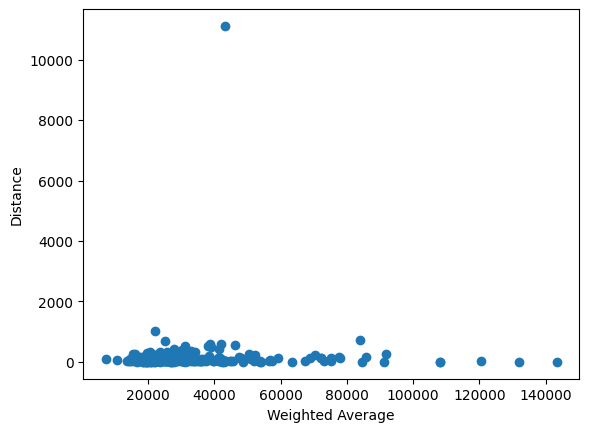

In [33]:
# plot weighted_avgs vs distance
import matplotlib.pyplot as plt
plt.scatter(weighted_avgs, list(df["Distance (pc)"]))
plt.ylabel("Distance")
plt.xlabel("Weighted Average")
# plt.xlim(0, 1)
# plt.ylim(0, 2000)

In [49]:
plt.show()

In [50]:
df

,Star Name,Distance (pc),Image URL,Spectral Class,Center Pixel,L/L_o,Average Color
0,Absolutno,273.845058,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8', 'V')",255,0.656000,"[0.18407557354925777, 0.2252093279957057, 0.26..."
1,Acamar,49.431537,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '2', 'V')",255,23.600000,"[0.33405011603654416, 0.38383178070734775, 0.4..."
2,Achernar,42.753313,https://alasky.u-strasbg.fr/hips-image-service...,"('B', '6', 'V')",233,97.521203,"[0.44570507710747476, 0.45847512151200503, 0.4..."
3,Achird,5.923041,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670,"[0.37773370776278403, 0.3622124472940845, 0.33..."
4,Acubens,54.554183,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '7', 'V')",255,8.149287,"[0.2444099031193941, 0.32214194401701723, 0.39..."
...,...,...,...,...,...,...,...
299,Zavijava,11.001766,https://alasky.u-strasbg.fr/hips-image-service...,"('F', '9', 'V')",255,1.193670,"[0.39950074485646414, 0.3782289096336686, 0.33..."
300,Zhang,76.182930,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '7', 'III')",255,40.426122,"[0.4033222833279631, 0.3809834322736615, 0.341..."
301,Zibal,36.503011,https://alasky.u-strasbg.fr/hips-image-service...,"('A', '4', 'V')",255,15.118020,"[0.24679645392315078, 0.29872981468004095, 0.3..."
302,Zubenelhakrabi,50.025013,https://alasky.u-strasbg.fr/hips-image-service...,"('G', '8.5', 'III')",255,46.156500,"[0.40048905343022995, 0.34168661906218467, 0.2..."


In [10]:
# Fit a graph with the type a/x^2 to the data
from scipy.optimize import curve_fit

func = lambda x, a: a / x
popt, pcov = curve_fit(func, weighted_avgs, list(df["Distance (pc)"]))
popt, pcov

(array([0.0003566]), array([[2.06643106e-08]]))

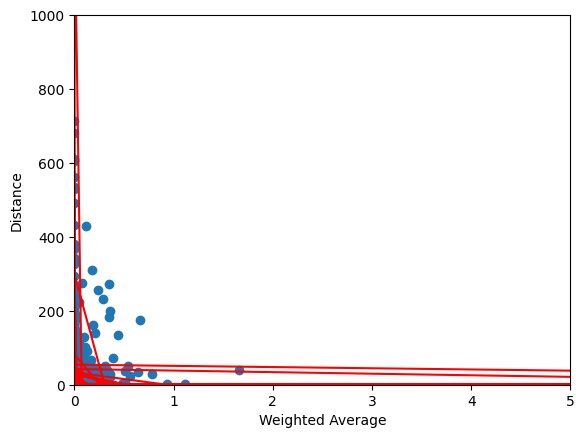

In [11]:
plt.scatter(weighted_avgs, list(df["Distance (pc)"]))
plt.plot(weighted_avgs, func(weighted_avgs, *popt), 'r-')
plt.ylabel("Distance")
plt.xlabel("Weighted Average")
plt.xlim(0, 5)
plt.ylim(0, 1000)
plt.show()

In [12]:
# calculate r^2 value for the fit
r2_score(list(df["Distance (pc)"]), func(weighted_avgs, *popt))

-0.024641122478807675

In [18]:
import scipy.stats
spearman_coefficient = scipy.stats.spearmanr(images, df["Distance (pc)"], axis=0)
print(spearman_coefficient.statistic)

[[ 1.          0.99178192  0.97516551 -0.58383404]
 [ 0.99178192  1.          0.99382833 -0.58324289]
 [ 0.97516551  0.99382833  1.         -0.57847755]
 [-0.58383404 -0.58324289 -0.57847755  1.        ]]
